<h1><center>HY473
<br>
1st Assignment
<br>
Athanasios Panagiotis Rentzelas
<br>
csd4734</center></h1>   

In [1]:
import numpy as np
import pandas as pd
import csv 

with open('data.csv', 'rt') as f:
    reader = csv.reader(f)
    next(reader)
    data_as_list = list(reader)
    data_as_array = np.array(data_as_list,dtype=float)

    classes = data_as_array[:,0]
    alcohol = data_as_array[:,1]
    color_intensity = data_as_array[:,2]

QUESTION A:

In [2]:
def prior_calc(classes):
    total_samples = float(sum(classes))
    res= np.zeros([len(classes)])
    for i in range(len(classes)):
        res[i] = float(classes[i])/total_samples
    return res

In the function above we calculate the prior probability of the classes given the data we got in the parametres txt.

In [3]:
samples = [132,273,216]
priors = prior_calc(samples)
for i in range(len(priors)):
    print("Prior probability of class ",i," is {:.3f}".format(priors[i]))


Prior probability of class  0  is 0.213
Prior probability of class  1  is 0.440
Prior probability of class  2  is 0.348


In [4]:
def likelihood(sample,means,covs):
    res = np.zeros([len(means)])
    for i in range(len(means)):
        meansm = np.array(means[i])
        covsm = np.array(covs[i])
        samplem = np.array(sample, dtype=float)
        dist = np.array(np.zeros_like(sample), dtype=float)
        dist = samplem-meansm
        dist_tr = np.transpose(dist)
        cov_inv = np.linalg.inv(covsm)
        cov_det=np.linalg.det(covsm)
        exp_inp = -(1/2)*(dist_tr@cov_inv)@dist
        e=np.exp(exp_inp)
        res[i] = e/np.sqrt(((2*(np.pi))**2)*cov_det)
    return res

In the function above we calculate the likelihood of a sample belonging to a specific class,by applying the formula for the multidimensional Gauss pdf.

In [5]:
means = [
    [13.744746, 5.528305], 
    [12.278732, 3.086620], 
    [13.15375, 7.39625]
]

covs = [
    [
        [0.213560, 0.233696], 
        [0.233696, 1.534063]
    ],
    [
        [0.289406, 0.134241], 
        [0.134241, 0.855494]
    ],
    [
        [0.281156, 0.429338], 
        [0.429338, 5.340454]
    ]
]


In [6]:
def posterior_calculator(sample):
    return likelihood(sample,means,covs)*priors

def get_best_pred(sample):
    return np.argmax(posterior_calculator(sample))

In the function above we calculate the Posterior Probabilities for each sample to belong to a specific class.We do this by multiplying the likelihood with the prior probability for each class.
We get the best prediction,by getting the index of the maximum Posterior probability.

In [7]:
yes = 0
predictions = np.apply_along_axis(get_best_pred, 1, data_as_array[:,[1,2]])

for i in range(len(predictions)):
    if predictions[i] == classes[i]:
        yes+=1

print("The success percentage of our Bayes classifier is {:.3f}%".format((yes/90)*100)) 

The success percentage of our Bayes classifier is 81.111%


QUESTION B:

In [8]:
costs = np.array([[0,-2,-4],
        [2,0,-2],
         [4,2,0]],dtype=float)

def Risk_calc(sample):   
    return posterior_calculator(sample)@costs

def min_Risk(sample):
    return np.argmin(Risk_calc(sample))

For each value,we matrix multiplied the posterior matrix with the cost matrix,so we basically do for costs[0]*Posterior[0]+costs[0]*Posterior[1]+costs[0]*Posterior[2] and as a result we get a 1x3 array of the risks for each action (Each action is one row of the costs matrix).
We get the best prediction,by getting the index of the minimum value of Risk.

In [9]:
yes=0
min_risk = np.apply_along_axis(min_Risk, 1, data_as_array[:,[1,2]])

for i in range(len(min_risk)):
    if min_risk[i] == classes[i]:
        yes+=1
        
print("The new accuracy after calculating the risks is {:.3f}%".format((yes/90)*100))

The new accuracy after calculating the risks is 33.333%


We observe this accuracy,because after calculating the risk,we see that the cost of predicting wrong the classes is big,so our classifier classifies everything as class 2 (1/3 of our data is predicted correctly).

QUESTION C:

Scatter Plot for the bayesian classifier.

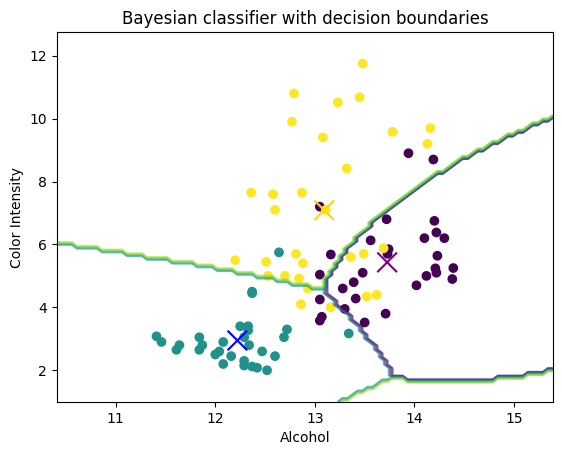

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
margin = 1
xlim = (np.min(alcohol)-margin, np.max(alcohol)+margin)
ylim = (np.min(color_intensity)-margin, np.max(color_intensity)+margin)
sample_rate = 100

xg = np.linspace(xlim[0], xlim[1], sample_rate)
yg = np.linspace(ylim[0], ylim[1], sample_rate)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

#Below we calculate the z values which are the classes we predicted for all the Xgrid values,in order to get the boundaries.We reshape it in order to get a 2D array instead of a 1D
z = np.apply_along_axis(get_best_pred, 1, Xgrid).reshape(xx.shape)

scatter = plt.scatter(alcohol, color_intensity, c=classes)

mean_alcohol = [np.mean(alcohol[classes == c]) for c in set(classes)]                   #I googgled to see how to find the means in one line (I hope there is no problem in that)
mean_color_intensity = [np.mean(color_intensity[classes == c]) for c in set(classes)]

plt.scatter(mean_alcohol, mean_color_intensity, c=['purple', 'blue', 'gold'], s=200, marker='x')

plot = plt.contour(xg, yg, z, alpha=0.6)
plt.title('Bayesian classifier with decision boundaries')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.show()

Scatter plot for the bayesian classifier,taking into consideration the Risk.

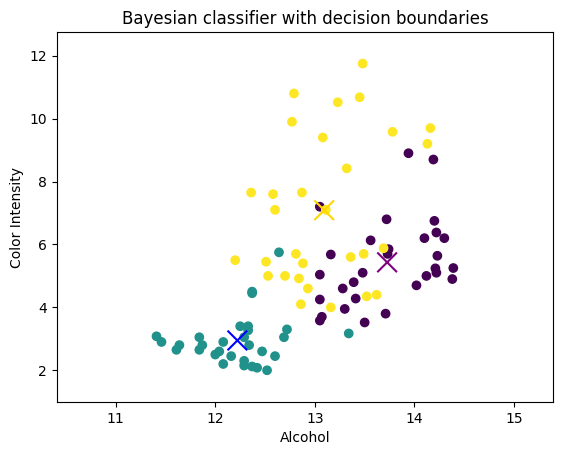

In [11]:
import matplotlib.pyplot as plt
margin = 1
xlim = (np.min(alcohol)-margin, np.max(alcohol)+margin)
ylim = (np.min(color_intensity)-margin, np.max(color_intensity)+margin)
sample_rate = 100

xg = np.linspace(xlim[0], xlim[1], sample_rate)
yg = np.linspace(ylim[0], ylim[1], sample_rate)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

#Below we calculate the z values which are the classes we predicted for all the Xgrid values,in order to get the boundaries.We reshape it in order to get a 2D array instead of a 1D
z = np.apply_along_axis(min_Risk, 1, Xgrid).reshape(xx.shape)

scatter = plt.scatter(alcohol, color_intensity, c=classes)

mean_alcohol = [np.mean(alcohol[classes == c]) for c in set(classes)]                   #I googgled to see how to find the means in one line (I hope there is no problem in that)
mean_color_intensity = [np.mean(color_intensity[classes == c]) for c in set(classes)]

plt.scatter(mean_alcohol, mean_color_intensity, c=['purple', 'blue', 'gold'], s=200, marker='x')

plot = plt.contour(xg, yg, z, alpha=0.6)
plt.title('Bayesian classifier with decision boundaries')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.show()

We observe that in the second scatter plot,we have no decision boundary,because everything is predicted as class 2 in order to minimize the error.